In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from catboost import CatBoostRegressor
import seaborn as sns
import matplotlib.pyplot as plt
from src.data.clean import agg_by_pos

In [2]:
pca_model_path = '../models'
df = pd.read_csv('../data/processed/player_data_clean.csv')
df = agg_by_pos(df, team_df='../data/interim/NBA_team_stats_1979-2024_clean.csv', save_file=False, use_pca=False)

In [3]:
df

,experienceC,fg_per_100_possC,fga_per_100_possC,x3p_per_100_possC,x3pa_per_100_possC,x2p_per_100_possC,x2pa_per_100_possC,ft_per_100_possC,fta_per_100_possC,orb_per_100_possC,...,wsSF,ws_48SF,obpmSF,dbpmSF,bpmSF,vorpSF,person_idSF,heightSF,weightSF,W%
0,7.000000,7.500000,13.900000,0.000000,0.000000,7.500000,13.900000,5.700000,8.500000,5.200000,...,1.400000,0.025000,-0.200000,-2.000000,-2.100000,-0.100000,1.110000e+02,80.000000,240.000000,0.341
1,6.085358,5.414879,11.127564,0.000000,0.000000,5.414879,11.089271,5.157557,7.536336,6.206343,...,3.100000,0.131000,0.300000,0.300000,0.600000,0.800000,6.730000e+02,81.000000,240.000000,0.305
2,7.561709,6.232848,11.639651,0.000000,0.028766,6.232848,11.582120,4.797279,6.968513,5.242468,...,2.800000,0.049000,1.000000,-1.800000,-0.800000,0.800000,7.540000e+02,78.000000,220.000000,0.402
3,2.000000,7.000000,17.100000,0.000000,0.000000,7.000000,17.100000,4.200000,9.100000,5.600000,...,3.191154,0.082642,-0.690967,-0.433375,-1.150715,0.608038,9.194319e+02,79.000000,234.725502,0.341
4,5.855107,6.518426,14.169766,0.000000,0.040787,6.518426,14.128979,4.686936,6.742212,5.292128,...,4.582300,0.092259,0.341972,0.379014,0.720986,1.587105,2.740855e+03,80.532238,217.983569,0.451
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550,8.429469,8.841786,16.127184,0.044965,0.157377,8.819303,15.969808,3.135941,4.705502,3.869751,...,4.416016,0.098963,-0.815677,0.504004,-0.311673,1.276315,5.274170e+05,79.544622,199.138446,0.524
551,9.611630,7.402010,13.150538,0.434458,0.920029,6.967552,12.230510,2.136827,3.399210,4.137976,...,6.578860,0.130302,0.265083,0.556888,0.821971,1.975059,7.458626e+05,79.237530,199.906176,0.390
552,9.568575,6.307989,12.699068,0.166378,1.455193,6.146405,11.258056,3.757390,5.258655,5.181758,...,5.049394,0.107883,-0.114208,0.751176,0.625731,1.527857,5.262295e+05,79.293419,206.908292,0.347
553,6.258272,8.428857,14.974173,1.049764,3.134809,7.379093,11.818780,2.836248,4.418715,4.090782,...,1.937539,0.065313,-1.748665,-0.220596,-1.969261,0.030037,1.629008e+06,79.203147,201.966845,0.427


In [4]:
X, y = df.drop(columns='W%'), df['W%']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
lin_reg = LinearRegression().fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 0.05319046256572641
R^2 Score: -1.5180764913907


<Axes: xlabel='W%'>

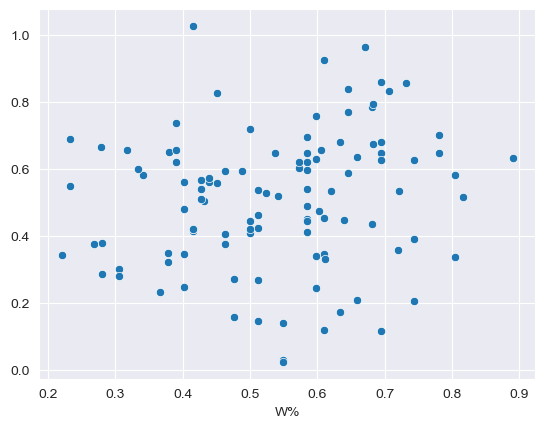

In [5]:
sns.scatterplot(x=y_test, y=y_pred)

In [6]:
rf_reg = RandomForestRegressor(random_state=41)
rf_reg.fit(X_train, y_train)
y_pred = rf_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 0.018414609039639637
R^2 Score: 0.1282385622503378


<Axes: xlabel='W%'>

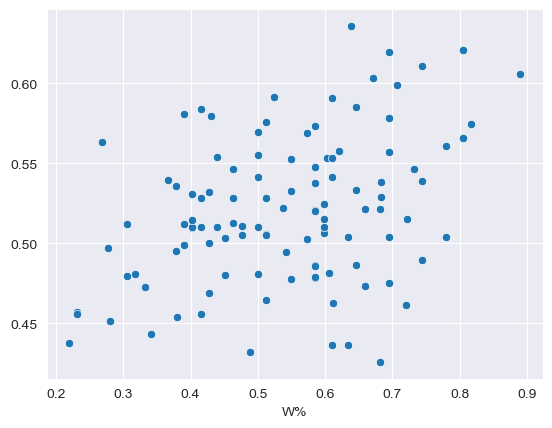

In [7]:
sns.scatterplot(x=y_test, y=y_pred)

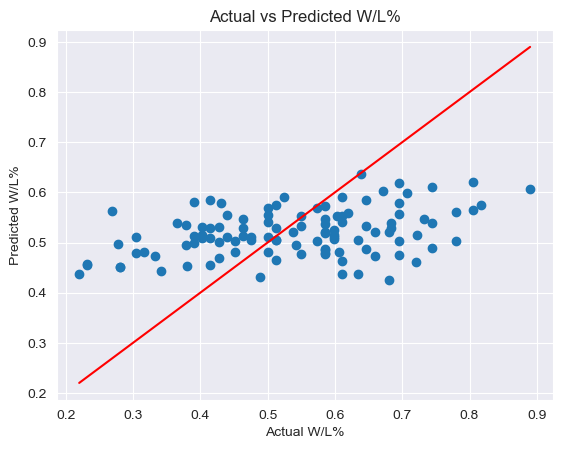

In [8]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual W/L%')
plt.ylabel('Predicted W/L%')
plt.title('Actual vs Predicted W/L%')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.show()

In [9]:
y_train_pred = rf_reg.predict(X_train)
mse = mean_squared_error(y_train, y_train_pred)
r2 = r2_score(y_train, y_train_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 0.002408521529954958
R^2 Score: 0.8728576934271934


In [10]:
cat_reg = CatBoostRegressor(iterations=1000, learning_rate=0.01, depth=6, l2_leaf_reg=3, bagging_temperature=1,
                            early_stopping_rounds=50, loss_function='RMSE', random_state=41, logging_level='Silent')
cat_reg.fit(X_train, y_train)
y_pred = cat_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 0.01792204787767027
R^2 Score: 0.15155677801119016


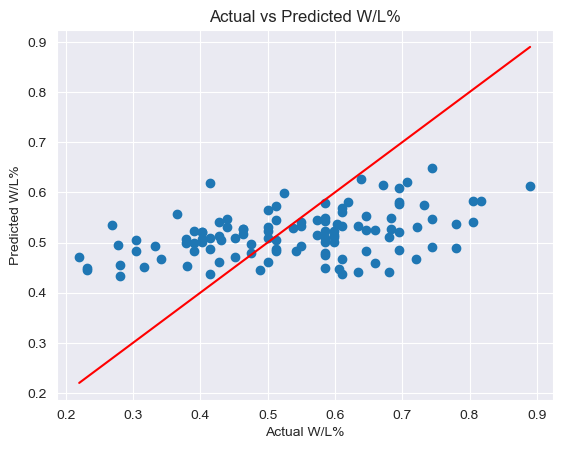

In [11]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual W/L%')
plt.ylabel('Predicted W/L%')
plt.title('Actual vs Predicted W/L%')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.show()

In [12]:
y_train_pred = cat_reg.predict(X_train)
mse = mean_squared_error(y_train, y_train_pred)
r2 = r2_score(y_train, y_train_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 0.002026414418943473
R^2 Score: 0.8930285654113771


In [13]:
# Just predicting average win %
n_test = len(y_test)
y_pred = np.full((n_test,), y_train.mean())
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 0.021642858620444766
R^2 Score: -0.024589200202798533
